In [5]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt

In [119]:
img = cv2.imread('../../img/box2.jpg', 0)

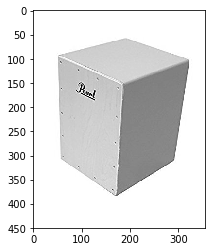

In [120]:
plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

thresholdで閾値操作

In [123]:
img.shape

(450, 356)

In [126]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

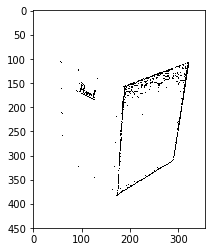

In [128]:
plt.plot(), plt.imshow(thresh, cmap = 'gray')
plt.show()

findContoursで輪郭を探す。contoursに輪郭座標一覧を返す

In [129]:
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)
print(len(contours))

181


In [141]:
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 6000]
print(len(contours))

1


boundingRectで位置情報を返す    
長方形の描画 cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])    
左上(pt1)と右下(pt2)の角の座標、および色(color)を指定

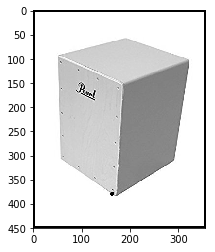

In [142]:
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
# img = cv2.rectangle(img_black,(x,y),(x+w,y+h),(255,0,0), 1, 1)

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

# Otsu's thresholding

In [200]:
img = cv2.imread('../../img/box2.jpg', 0)

In [201]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

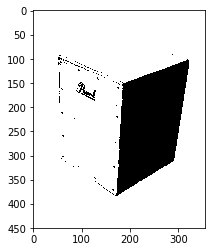

In [202]:
plt.plot(), plt.imshow(th2, cmap = 'gray')
plt.show()

# Otsu's thresholding and Gaussian filtering

In [143]:
img = cv2.imread('../../img/box2.jpg', 0)

In [144]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

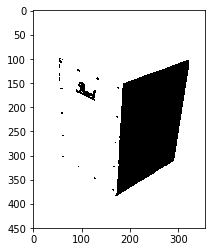

In [145]:
plt.plot(), plt.imshow(th3, cmap = 'gray')
plt.show()

In [156]:
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)
print(len(contours))

181


In [159]:
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 400]
print(len(contours))

3


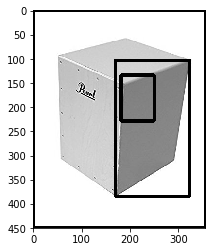

In [162]:
def get_rect(img, cnt):
    x,y,w,h = cv2.boundingRect(cnt)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    return img

[get_rect(img, cnt) for cnt in contours]

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()

全然欲しい検出ができてない

# adaptiveThreshold

In [192]:
img = cv2.imread('../../img/box2.jpg', 0)

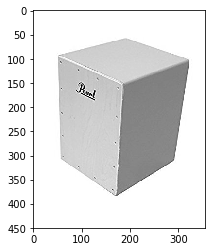

In [193]:
plt.plot(), plt.imshow(img, cmap = 'gray')
plt.show()

In [194]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

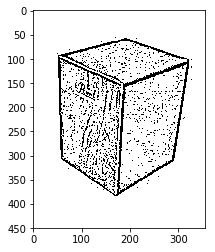

In [195]:
plt.plot(), plt.imshow(th2, cmap = 'gray')
plt.show()

In [196]:
imgEdge,contours,hierarchy = cv2.findContours(th2, 1, 2)
print(len(contours))

1449


In [198]:
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 6000]
print(len(contours))

4


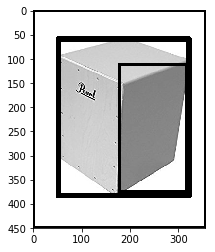

In [199]:
def get_rect(img, cnt):
    x,y,w,h = cv2.boundingRect(cnt)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    return img

[get_rect(img, cnt) for cnt in contours]

plt.plot(), plt.imshow(img,cmap = 'gray')
plt.show()